## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Provition of a descriptive analysis report for each cluster, highlighting how each cluster is different from the other.


### b) Defining the Metric for Success

The project will be a success when we are able to create a model that can accurately classify new
nuclear test explosions using the new labelPerform wine segmentation.clusters with clear boundaries.

### c) Understanding the Context 

There has been quite a large number of nuclear explosions in the past, with nuclear test
explosions being the most. Such tests have been done on test sites on land or waters
owned, controlled or leased from the owners by one of the eight nuclear nations: the
United States, the Soviet Union, United Kingdom, France, China, India, Pakistan or
North Korea, or has been done on or over ocean sites far from territorial waters.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [2]:
pwd

'D:\\Coding\\Python\\After-work'

In [3]:
df = pd.read_csv('nuclear_explosions.csv')
df.head()

date_long  year  id_no country      region source  latitude  longitude  \
0   19450716  1945  45001     USA  ALAMOGORDO    DOE     32.54    -105.57   
1   19450805  1945  45002     USA   HIROSHIMA    DOE     34.23     132.27   
2   19450809  1945  45003     USA    NAGASAKI    DOE     32.45     129.52   
3   19460630  1946  46001     USA      BIKINI    DOE     11.35     165.20   
4   19460724  1946  46002     USA      BIKINI    DOE     11.35     165.20   

   magnitude_body  magnitude_surface  depth  yield_lower  yield_upper purpose  \
0             0.0                0.0  -0.10         21.0         21.0      WR   
1             0.0                0.0  -0.60         15.0         15.0  COMBAT   
2             0.0                0.0  -0.60         21.0         21.0  COMBAT   
3             0.0                0.0  -0.20         21.0         21.0      WE   
4             0.0                0.0   0.03         21.0         21.0      WE   

        name     type  
0    TRINITY    TOWER  
1  LITTLEBOY  AIRDROP  
2     FATMAN  AIRDROP  
3       ABLE  AIRDROP  
4      BAKER       UW

In [3]:
# check dataset shape
df.shape

(2051, 16)

In [4]:
# chekc data types
df.dtypes

date_long              int64
year                   int64
id_no                  int64
country               object
region                object
source                object
latitude             float64
longitude            float64
magnitude_body       float64
magnitude_surface    float64
depth                float64
yield_lower          float64
yield_upper          float64
purpose               object
name                  object
type                  object
dtype: object

In [4]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(2051, 16)

In [5]:
# check for missing data
df.isna().sum()

date_long              0
year                   0
id_no                  0
country                0
region                 0
source                 0
latitude               0
longitude              0
magnitude_body         0
magnitude_surface      0
depth                  0
yield_lower            3
yield_upper            5
purpose                1
name                 665
type                   0
dtype: int64

In [6]:
df_copy = df.copy()
df_copy.sample(10)

date_long  year  id_no country        region source  latitude  \
239    19580906  1958  58056     USA    S.ATLANTIC    DOE    -48.50   
1538   19790924  1979  79038    USSR       NZ RUSS    ISC     73.37   
108    19560611  1956  56013     USA      ENEWETAK    DOE     11.30   
1378   19770219  1977  77001  FRANCE       MURUROA    ISC    -22.14   
1494   19781218  1978  78051    USSR  AZGIE KAZAKH    ISC     47.78   
221    19580629  1958  58038     USA        BIKINI    DOE     11.35   
1152   19720727  1972  72017  FRANCE       MURUROA    DOE    -22.00   
1819   19841228  1984  84053    USSR   SEMI KAZAKH    NOA     49.00   
335    19611004  1961  61033    USSR   SEMI KAZAKH    MTM     50.00   
632    19640719  1964  64021    USSR   SEMI KAZAKH    UGS     49.90   

      longitude  magnitude_body  magnitude_surface    depth  yield_lower  \
239       -9.70             0.0                0.0 -160.000        1.000   
1538      54.58             5.7                4.5    0.000        0.001   
108      162.15             0.0                0.0   -0.100        8.000   
1378    -138.72             5.2                0.0    0.000        0.000   
1494      48.14             5.9                5.2    0.000      103.000   
221      165.20             0.0                0.0   -0.001       14.000   
1152    -139.00             0.0                0.0    0.000        0.000   
1819      80.00             6.6                0.0    0.000        0.001   
335       78.00             0.0                0.0    0.000       13.000   
632       78.10             5.5                0.0    0.000       20.000   

      yield_upper purpose       name      type  
239           2.0      WE  ARGUS:III    ROCKET  
1538        150.0      WE        NaN    TUNNEL  
108           8.0      WR  BLACKFOOT     TOWER  
1378         20.0      WR   ULYSSE B  SHAFT/GR  
1494        103.0     PNE        NaN     SHAFT  
221          14.0      WR    HICKORY     BARGE  
1152         20.0      WR     OBERON   BALLOON  
1819        150.0  WR/PNE        NaN     SHAFT  
335          13.0      WR        NaN   ATMOSPH  
632         150.0     FMS        NaN    TUNNEL

In [7]:
#Retrieve month and date
from datetime import datetime
df['date_long'] = df['date_long'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

df['month'] = df['date_long'].map(lambda x: x.month)
df['day'] = df['date_long'].map(lambda x: x.day)
df.head()


date_long  year  id_no country      region source  latitude  longitude  \
0 1945-07-16  1945  45001     USA  ALAMOGORDO    DOE     32.54    -105.57   
1 1945-08-05  1945  45002     USA   HIROSHIMA    DOE     34.23     132.27   
2 1945-08-09  1945  45003     USA    NAGASAKI    DOE     32.45     129.52   
3 1946-06-30  1946  46001     USA      BIKINI    DOE     11.35     165.20   
4 1946-07-24  1946  46002     USA      BIKINI    DOE     11.35     165.20   

   magnitude_body  magnitude_surface  depth  yield_lower  yield_upper purpose  \
0             0.0                0.0  -0.10         21.0         21.0      WR   
1             0.0                0.0  -0.60         15.0         15.0  COMBAT   
2             0.0                0.0  -0.60         21.0         21.0  COMBAT   
3             0.0                0.0  -0.20         21.0         21.0      WE   
4             0.0                0.0   0.03         21.0         21.0      WE   

        name     type  month  day  
0    TRINITY    TOWER      7   16  
1  LITTLEBOY  AIRDROP      8    5  
2     FATMAN  AIRDROP      8    9  
3       ABLE  AIRDROP      6   30  
4      BAKER       UW      7   24

In [8]:
#Dropping columns that are not required
df.drop(columns=['date_long', 'id_no', 'name'], inplace=True)
df.isnull().sum()

year                 0
country              0
region               0
source               0
latitude             0
longitude            0
magnitude_body       0
magnitude_surface    0
depth                0
yield_lower          3
yield_upper          5
purpose              1
type                 0
month                0
day                  0
dtype: int64

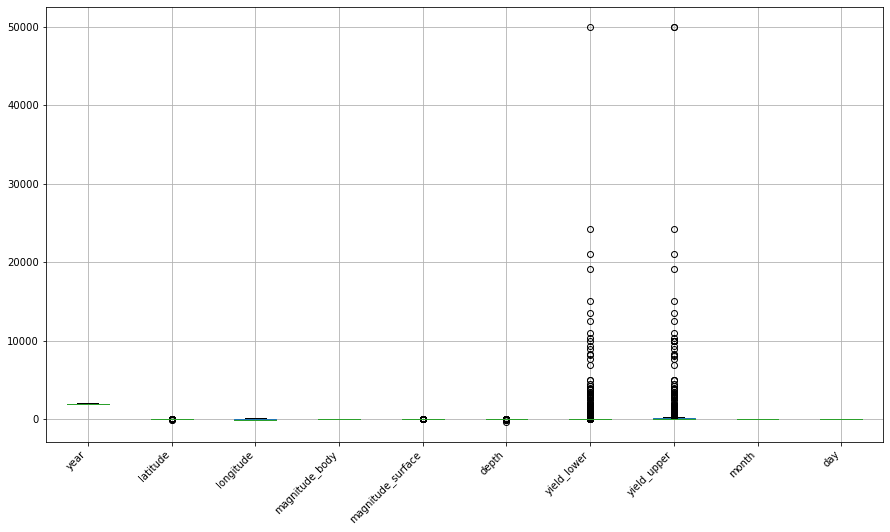

In [9]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot(rot = 45)
plt.xticks(ha = 'right')
plt.show()

From this we can tell that the columns yield_lower and yield_upper hve a lot of outliers.


In [10]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(10)

(893, 15)


year country        region source  latitude  longitude  magnitude_body  \
1361  1976    USSR       NZ RUSS    ISC    73.400     54.470             5.1   
1387  1977     USA           NTS    ISC    37.100   -116.060             5.3   
86    1955     USA           NTS    DOE    37.000   -116.000             0.0   
180   1957      UK  CHRISTMAS IS    DOE     2.000   -157.000             0.0   
1960  1988  FRANCE    FANGATAUFA    WTN   -22.244   -138.836             0.0   
1111  1971     USA   AMCHITKA AK    UGS    51.500    179.100             6.8   
1062  1970    USSR  MANGY KAZAKH    ISC    43.870     54.780             6.0   
1780  1984  FRANCE       MURUROA    UGS   -21.933   -138.992             5.3   
1535  1979     USA           NTS    ISC    37.150   -116.040             0.0   
230   1958     USA      ENEWETAK    DOE    11.300    162.150             0.0   

      magnitude_surface  depth  yield_lower  yield_upper  purpose      type  \
1361                0.0  0.000          0.0         20.0  WR/F/SA    TUNNEL   
1387                0.0  0.564         20.0        150.0       WR     SHAFT   
86                  0.0 -0.200         28.0         28.0       WR     TOWER   
180                 0.0  0.000       1800.0       1800.0       WR   AIRDROP   
1960                0.0  0.000          0.0        150.0       WR  SHAFT/LG   
1111                5.7  0.000          0.0       5000.0       WR     SHAFT   
1062                0.0  0.000         80.0         80.0      PNE     SHAFT   
1780                0.0  0.000          0.0        150.0       WR  SHAFT/LG   
1535                0.0  0.200          0.0         20.0       WR     SHAFT   
230                 0.0 -0.001       2000.0       2000.0       WR     BARGE   

      month  day  
1361     10   20  
1387      5   25  
86        5   15  
180      11    8  
1960     11   30  
1111     11    6  
1062     12   12  
1780      6   16  
1535      9    8  
230       7   26

In [11]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

43.54

The outliers, are 43.54% of the total records hence, we will work with the outliers.

In [12]:
#Dealing with null values
df['yield_lower'] = df['yield_lower'].fillna(df['yield_lower'].mean())
df['yield_upper'] = df['yield_upper'].fillna(df['yield_upper'].mean())

In [13]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: year
Number of unique variables: 50
[1945 1946 1948 1949 1951 1952 1953 1954 1955 1956 1957 1958 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1998]

Variable: country
Number of unique variables: 7
['USA' 'USSR' 'UK' 'FRANCE' 'CHINA' 'INDIA' 'PAKIST']

Variable: region
Number of unique variables: 79
['ALAMOGORDO' 'HIROSHIMA' 'NAGASAKI' 'BIKINI' 'ENEWETAK' 'SEMI KAZAKH'
 'NTS' 'MONTEB AUSTR' 'EMU AUSTR' 'ORENBG RUSS' 'OFFUSWCOAST' 'NZ RUSS'
 'KAZAKH' 'MARALI AUSTR' 'MTR RUSS' 'MELLIS NV' 'MALDEN IS' 'N2 RUSS'
 'CHRISTMAS IS' 'PACIFIC' 'JOHNSTON IS' 'S. ATLANTIC' 'S.ATLANTIC'
 'HTR RUSS' 'REGGANE ALG' 'IN ECKER ALG' 'CARLSBAD NM' 'NELLIS NV'
 'FALLON NV' 'LOP NOR' 'HATTIESB MS' 'BASHKIR RUSS' 'AMCHITKA AK'
 'AZGIR KAZAKH' 'MURUHOA' 'MURUROA' 'FANGATAUFA' 'UZBEK' 'HATTIESE MS'
 'MURUEOA' 'TYUMEN RUSS' 'FARMINGT NM' 'C. NEVADA' 'PAMUK UZBEK

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [14]:
# get descriptive statistics
df.describe()

year     latitude    longitude  magnitude_body  \
count  2051.000000  2051.000000  2051.000000     2051.000000   
mean   1970.899074    35.397331   -36.048777        2.144905   
std      10.367353    23.403654   100.864340        2.624897   
min    1945.000000   -49.500000  -169.320000        0.000000   
25%    1962.000000    37.000000  -116.054000        0.000000   
50%    1970.000000    37.100000  -116.000000        0.000000   
75%    1979.000000    49.870000    78.000000        5.100000   
max    1998.000000    75.100000   179.220000        7.400000   

       magnitude_surface        depth   yield_lower   yield_upper  \
count        2051.000000  2051.000000   2051.000000   2051.000000   
mean            0.355826    -0.489633    209.217532    323.431021   
std             1.202229    10.967699   1640.145504   2052.695191   
min             0.000000  -400.000000      0.000000      0.000000   
25%             0.000000     0.000000      0.000000     19.000000   
50%             0.000000     0.000000      0.001000     20.000000   
75%             0.000000     0.000000     20.000000    150.000000   
max             6.000000     1.451000  50000.000000  50000.000000   

             month          day  
count  2051.000000  2051.000000  
mean      7.282301    16.669917  
std       3.129837     8.800708  
min       1.000000     1.000000  
25%       5.000000     9.000000  
50%       8.000000    17.000000  
75%      10.000000    24.500000  
max      12.000000    31.000000

Some of the values have large ranges hence need to scale them. 

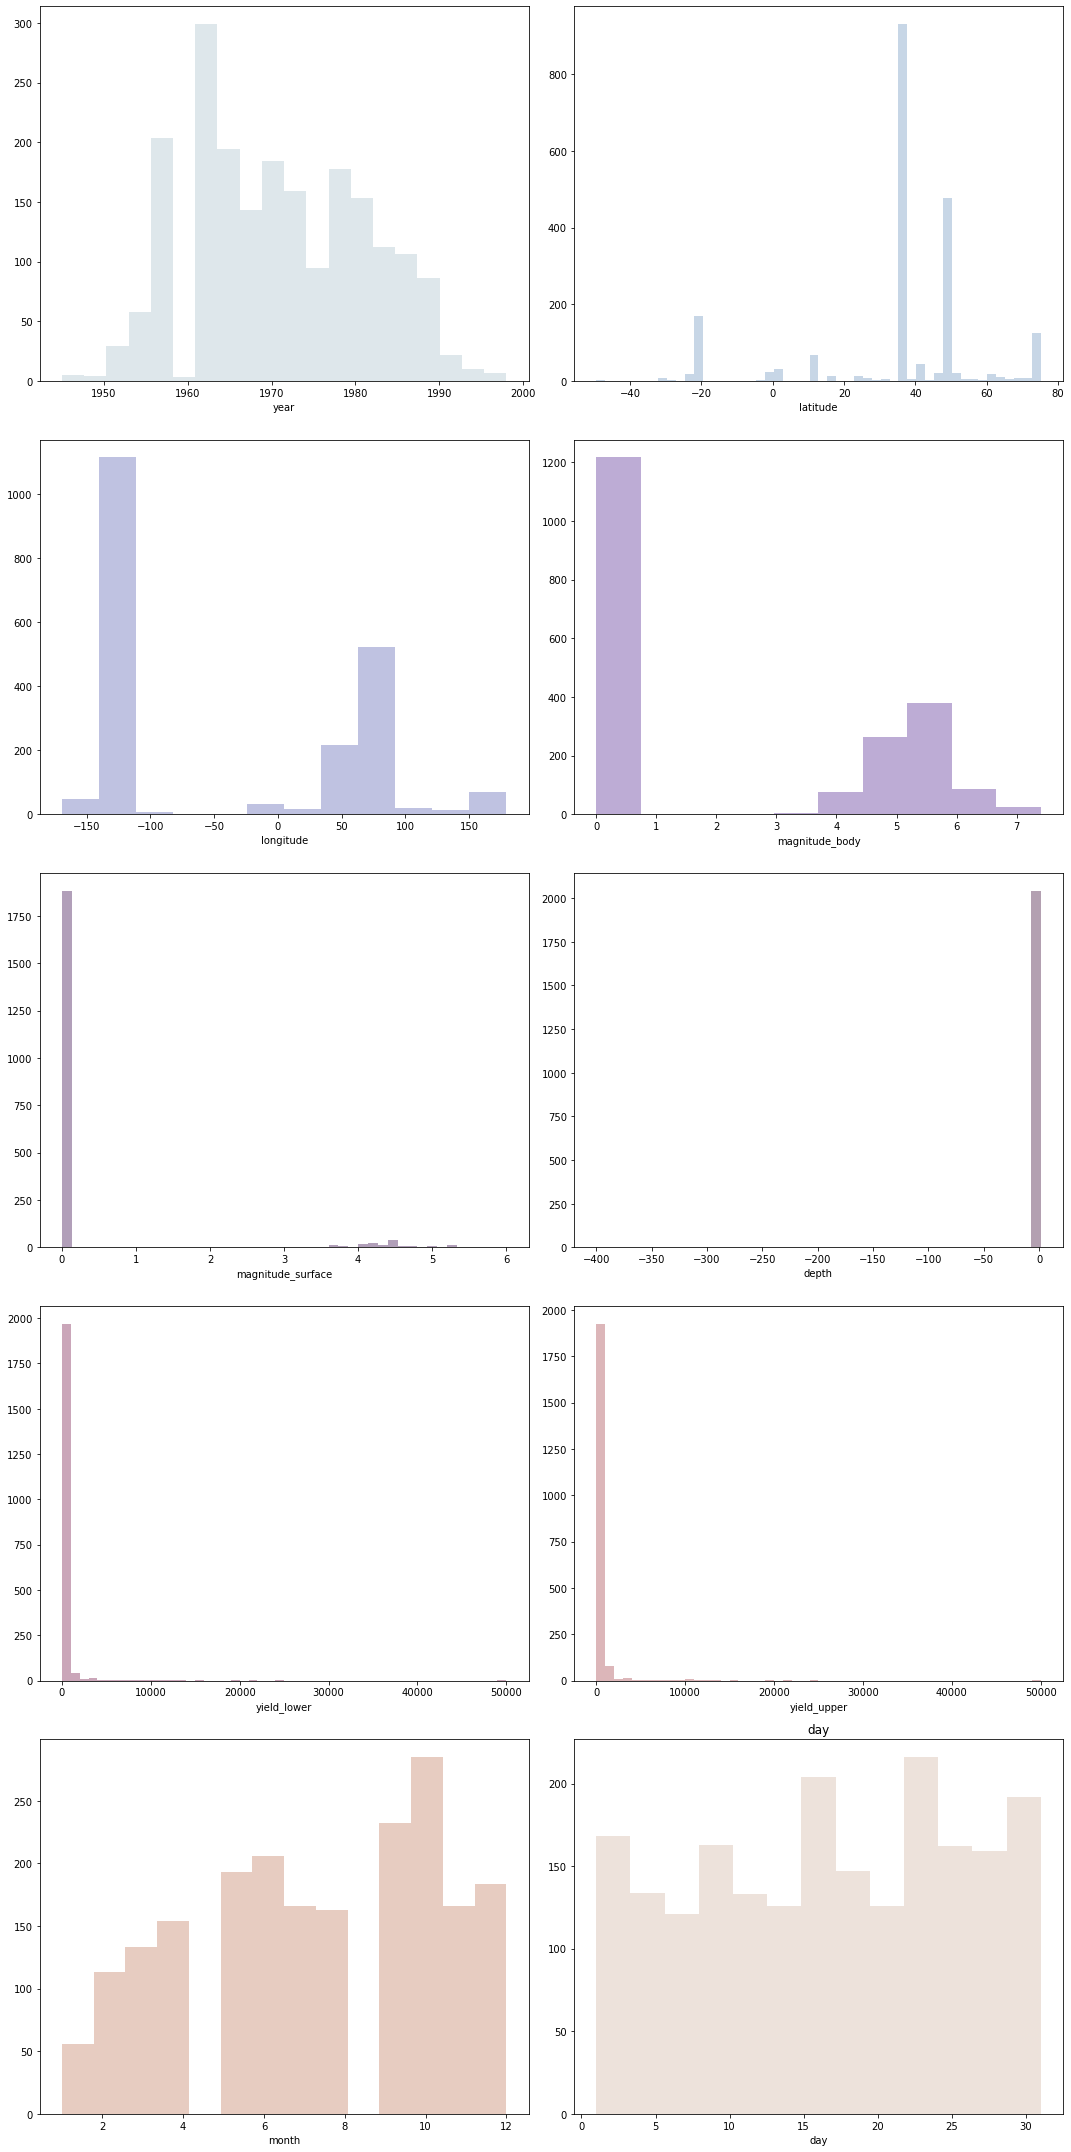

In [15]:
# previewing the histograms of each variable

# selecting the columns that are numerical variables
num_var = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()
num_length = round(len(num_var) / 2)

colors = sns.color_palette("twilight", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.distplot(df[var], ax = ax, color = color, kde = False, kde_kws = {'alpha' : 0.6})
    plt.title(var)
    
plt.tight_layout()

From the bar graphs it can be noted that, most of the columns have outliers.

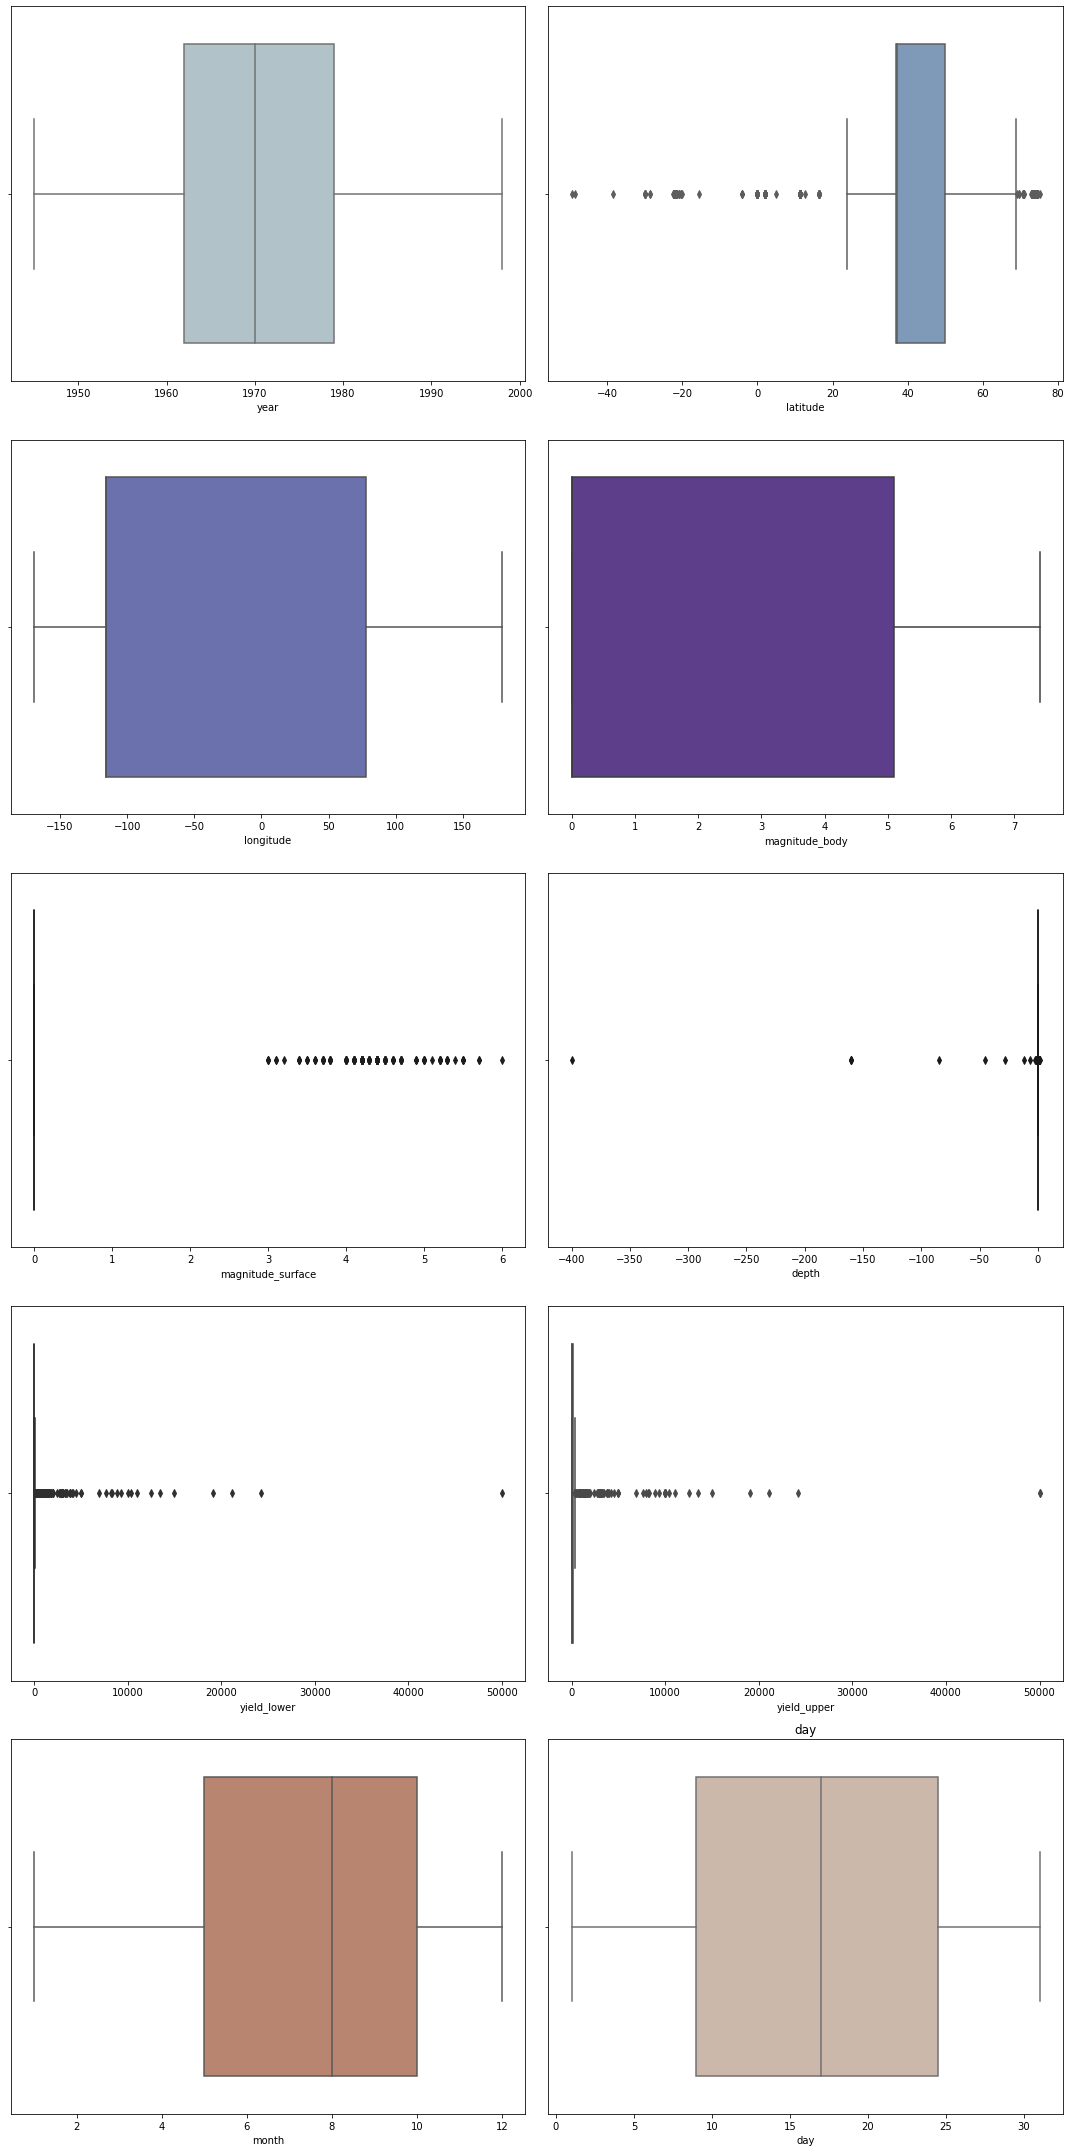

In [16]:
# previewing the boxplots of each variable

# selecting the columns that are numerical variables
num_var = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()
num_length = round(len(num_var) / 2)

colors = sns.color_palette("twilight", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.boxplot(df[var], ax = ax, color = color)
    plt.title(var)
    
plt.tight_layout()

Just as seen in the bar plot most of the variables have outliers.

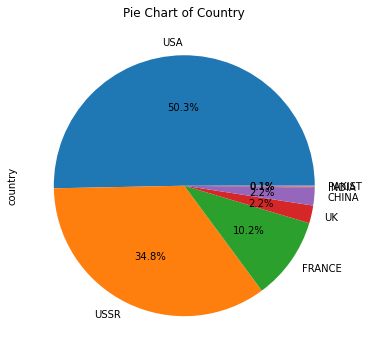

In [17]:
#Checking distribution per country

plt.figure(figsize = (6, 6))
df.country.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Country')
plt.show()

From the chart it can be seen that USA diployed the most of the bombs.

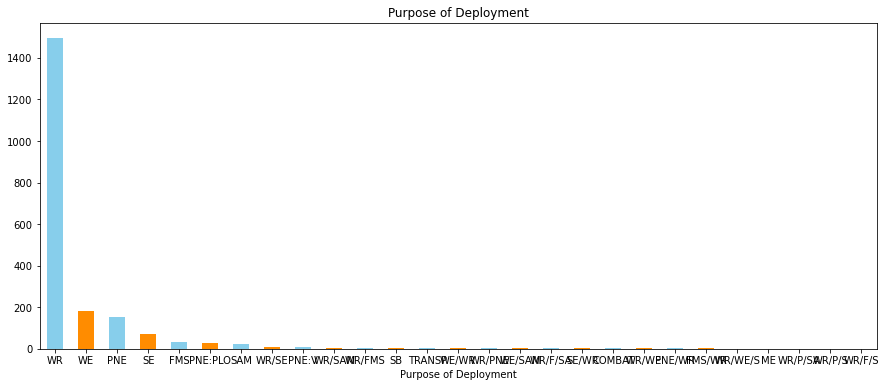

In [18]:
#Checking distribution per purpose


plt.figure(figsize = (15, 6))
df.purpose.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Purpose of Deployment')
plt.xlabel('Purpose of Deployment')
plt.show()

It is seen that most of the bombs were for Weapons development program (WR)

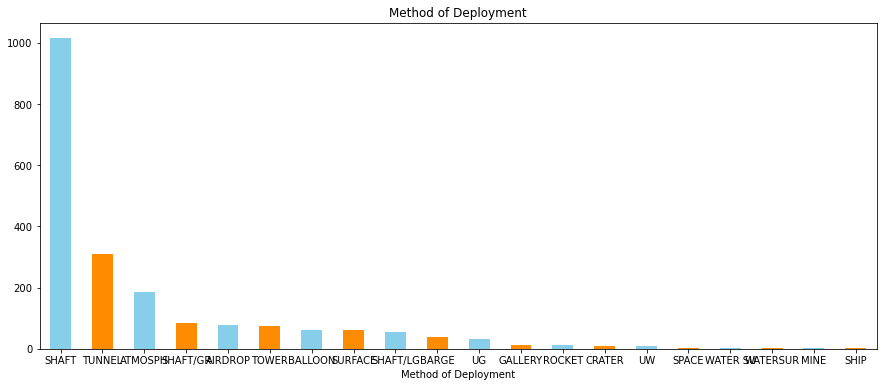

In [19]:
#Checking distribution per type


plt.figure(figsize = (15, 6))
df.type.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Method of Deployment')
plt.xlabel('Method of Deployment')
plt.show()

### 3.2 Bivariate Analysis

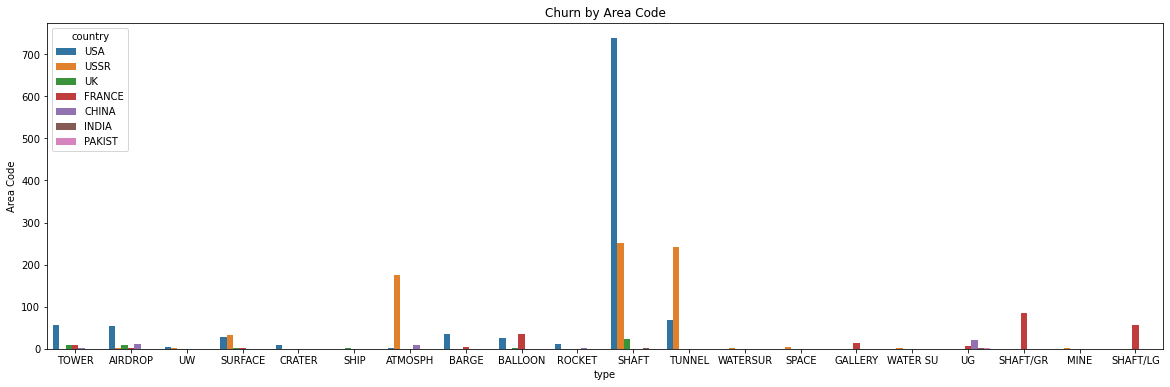

In [20]:
plt.figure(figsize = (20, 6))
country_type = sns.countplot('type', hue = 'country', data = df)
country_type.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

It is noted that USA is leading in Tower, Airdrop, Crater, Barge, Rocket and Shaft type of explosion with shaft explosion having the highest count.
As for USSR is the second country with explosion counts.


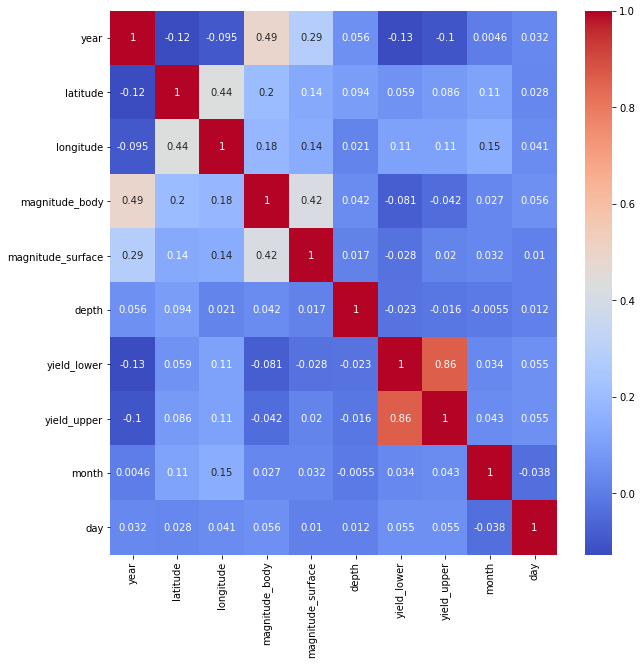

In [21]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

There is correlation between some of the variables, with yield_lower and yield_upper haveing the hightest corrlation with a value of 0.86

### 3.3 Feature Engineering

In [22]:
df.dtypes

year                   int64
country               object
region                object
source                object
latitude             float64
longitude            float64
magnitude_body       float64
magnitude_surface    float64
depth                float64
yield_lower          float64
yield_upper          float64
purpose               object
type                  object
month                  int64
day                    int64
dtype: object

In [23]:
#Encoding the object elements to numbers

var_encode = ['country', 'region', 'source', 'purpose','type']

df['country'] = df['country'].astype('category').cat.codes
df['region'] = df['region'].astype('category').cat.codes
df['source'] = df['source'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes

df.dtypes

year                   int64
country                 int8
region                  int8
source                  int8
latitude             float64
longitude            float64
magnitude_body       float64
magnitude_surface    float64
depth                float64
yield_lower          float64
yield_upper          float64
purpose                 int8
type                    int8
month                  int64
day                    int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

to_encode = df.select_dtypes(include = ['object']).columns.to_list()

for x in to_encode:
  le = LabelEncoder().fit(df[x].unique())
  df[x] = le.transform(df[x].values)


In [ ]:
to_encode = df.select_dtypes(include = ['object']).columns.to_list()
to_encode

## <font color='#2F4F4F'>4. Data Modeling</font>

In [26]:
# set all the features into X
X = df.iloc[:,].values

X.shape

(2051, 15)

In [27]:
# scale our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### 4.1 KMeans Clustering

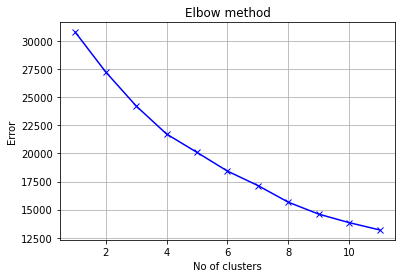

In [28]:
# getting the optimum value of k for our KMeans model using the Elbow Method

from sklearn.cluster import KMeans

# Creating an empty list, to place the SSE
Error = []

# Next we run the Kmeans algorithm sevral times lets say 11, and using a for loop, we append the values of SSE to the Error list
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
    
# Next plot the graph of No of clusters vs Error
plt.plot(range(1, 12), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

From the elbow graph, a cluster of k = 4 is ideal.

In [29]:
# fitting KMeans with 12 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=0)
kmeans.fit(X)

# getting the cluster labels
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 1])

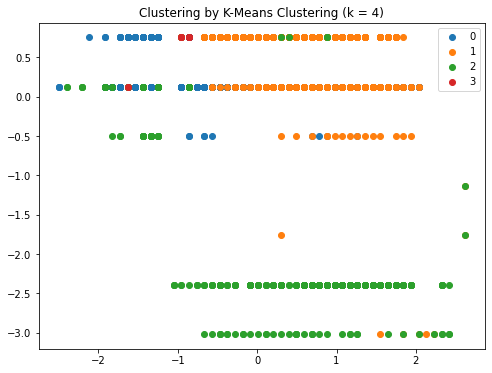

In [30]:
# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 4)")
plt.legend()
plt.show()

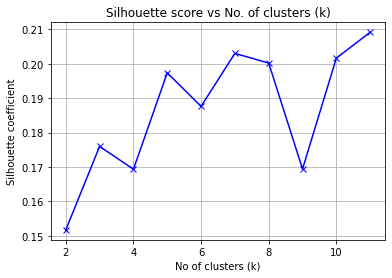

In [31]:
# visualizing the distribution of errors per number of clusters

# Using Silhouette Analysis
from sklearn.metrics import silhouette_score
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Ploting the graph
plt.plot(range(2, 12), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

In [32]:
# add these cluster labels to our dataset
df['kmeans_cluster_group'] = kmeans.labels_

# previewing a sample of our dataset
df.sample(10)

year  country  region  source  latitude  longitude  magnitude_body  \
165   1957        5      56       2    37.000   -116.000             0.0   
342   1961        6      68       2    50.000     78.000             0.0   
809   1967        5      56       2    37.000   -116.000             0.0   
1474  1978        6      29       4    61.530    112.870             5.2   
1666  1982        1      52       9   -22.000   -139.000             0.0   
1933  1988        6      57       3    73.364     54.445             6.4   
64    1954        6      68       5    50.000     78.000             0.0   
1087  1971        5      56       2    37.000   -116.000             0.0   
1731  1983        6      33      10    51.344     53.291             5.2   
1696  1982        6      30      10    61.553    112.864             5.3   

      magnitude_surface  depth  yield_lower  yield_upper  purpose  type  \
165                 0.0  -0.25        1.000         1.00       16     2   
342                 0.0   0.00       15.000        15.00       16     1   
809                 0.0   0.00        0.000        20.00       16     8   
1474                0.0   0.00       15.000        15.00        4    15   
1666                0.0   0.00        0.000         5.00       16     9   
1933                3.8   0.00        0.001        20.00       13    15   
64                  0.0   0.00        0.030         0.03       16     1   
1087                0.0   0.00        0.000        20.00        7    15   
1731                0.0   0.00       15.000        15.00        4     8   
1696                0.0   0.00       15.000        15.00        4     8   

      month  day  kmeans_cluster_group  
165       9    8                     3  
342      10   12                    10  
809       4    4                     3  
1474     10    7                     9  
1666      3   23                     2  
1933      5    7                     0  
64       10    1                    10  
1087      7    1                     3  
1731      7   10                     9  
1696     10   10                     9

### 4.2 Hierarchical Agglomerative Clustering

In [33]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC
agglo_clusterer = AC().fit(X)


# get the labels
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

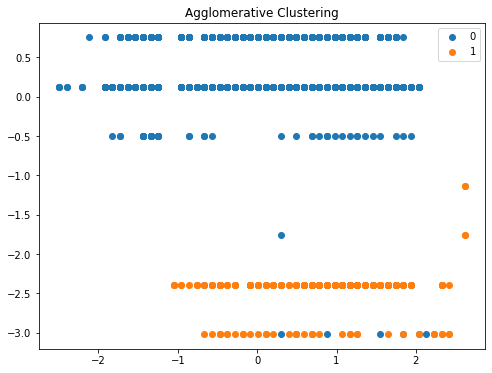

In [34]:
# Creating a scatter plot of the cluster analysis
agglo_clust = np.unique(labels)

plt.figure(figsize = (8, 6))
for cluster in agglo_clust:
    row_ix = np.where(labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

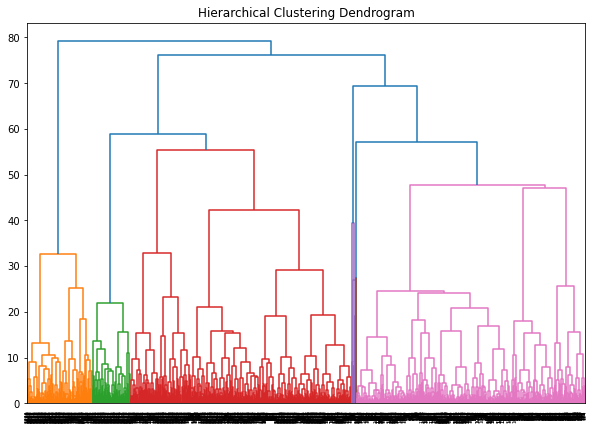

In [35]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

By drawing a line perpendicular to the largest vertical distance that doesnâ€™t intersect any of the other clusters, the best obtimal cluster is three.

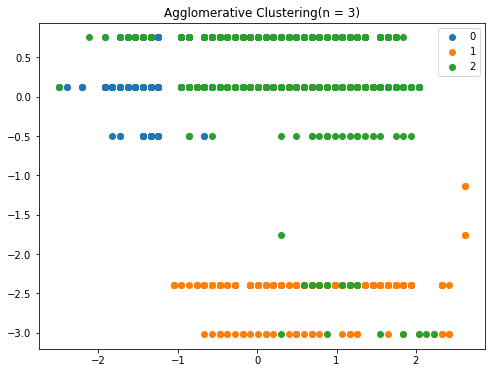

In [36]:
# improve your agglomerative clustering model
agglo_new = AC(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
labels = agglo_new.labels_
#plotting the new cluster
agglo_clust = np.unique(labels)

plt.figure(figsize = (8, 6))
for cluster in agglo_clust:
    row_ix = np.where(labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Agglomerative Clustering(n = 3)")
plt.legend()

In [37]:
# adding to our dataset
df['agglo_clust'] = labels

# previewing a sample of our dataset
df.sample(10)

year  country  region  source  latitude  longitude  magnitude_body  \
987   1969        5      56       2    37.000   -116.000             0.0   
126   1956        4      43       2   -30.000    131.000             0.0   
1197  1973        5      56       2    37.000   -116.000             0.0   
740   1966        6       6       1    47.900     47.700             0.0   
855   1967        5      56       2    37.000   -116.000             0.0   
1932  1988        6      68       3    49.928     78.769             7.2   
125   1956        4      43       2   -30.000    131.000             0.0   
105   1956        5      16       2    11.300    162.150             0.0   
313   1961        6      68       5    50.000     78.000             0.0   
1012  1970        5      56       4    37.130   -116.210             0.0   

      magnitude_surface  depth  yield_lower  yield_upper  purpose  type  \
987                 0.0    0.0          0.0         20.0       10     8   
126                 0.0    0.0         10.0         10.0       16    14   
1197                0.0    0.0          0.0         20.0       16     8   
740                 0.0    0.0          1.1          1.1        4     8   
855                 0.0    0.0          0.0         20.0       16     8   
1932                4.4    0.0         20.0        150.0        1     8   
125                 0.0    0.0          3.0          3.0       16     0   
105                 0.0   -0.1         14.9         14.9       16    14   
313                 0.0    0.0          0.3          0.3       16     1   
1012                0.0    0.0          0.0         20.0       13    15   

      month  day  kmeans_cluster_group  agglo_clust  
987      10   16                     3            0  
126      10   22                     7            0  
1197      6   28                     3            0  
740       4   22                     9            2  
855      12    6                     3            0  
1932      5    4                     0            2  
125      10   11                     7            0  
105       5   30                     7            0  
313       9   11                    10            0  
1012      2   11                     3            0

### 4.2 Classification

In [38]:
#Adding a new column, label and prefixing the available records as old.
#Where the old are to have a value of 0 and new a value of 1
df['label'] = 0
df.head()

year  country  region  source  latitude  longitude  magnitude_body  \
0  1945        5       0       2     32.54    -105.57             0.0   
1  1945        5      24       2     34.23     132.27             0.0   
2  1945        5      54       2     32.45     129.52             0.0   
3  1946        5       9       2     11.35     165.20             0.0   
4  1946        5       9       2     11.35     165.20             0.0   

   magnitude_surface  depth  yield_lower  yield_upper  purpose  type  month  \
0                0.0  -0.10         21.0         21.0       16    14      7   
1                0.0  -0.60         15.0         15.0        0     0      8   
2                0.0  -0.60         21.0         21.0        0     0      8   
3                0.0  -0.20         21.0         21.0       13     0      6   
4                0.0   0.03         21.0         21.0       13    17      7   

   day  kmeans_cluster_group  agglo_clust  label  
0   16                     7            2      0  
1    5                     9            0      0  
2    9                     9            0      0  
3   30                     7            0      0  
4   24                     7            0      0

In [39]:
#Pre-requisites

from sklearn.model_selection import train_test_split #For spliting the dataset

from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

from sklearn.metrics import classification_report, accuracy_score # For checking accuracy

from sklearn.metrics import confusion_matrix  # For confusion Matrix

In [40]:
#Setting y values
y = df['label'].values

print(X.shape)
print(y.shape)

(2051, 15)
(2051,)


In [43]:
# For the New records, we are to record them as (df2)

#Creating a method to classify the combined New and Old records

def classify_records(df, df2):
    #Joining the two two dataframe
    df.append(df2)
    
    #Setting the values
    X = df.drop(columns="label").values
    y = df['label'].values


    # Split the dataset into training and test subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


    #Make Instace of Classifier
    logistic_classifier = LogisticRegression()
    decision_classifier = DecisionTreeClassifier()
    svm_classifier = SVC()
    knn_classifier = KNeighborsClassifier()
    naive_classifier = GaussianNB()

    # Train the classifiers, i.e fit them
    logistic_classifier.fit(X_train, y_train)
    decision_classifier.fit(X_train, y_train)
    svm_classifier.fit(X_train, y_train)
    knn_classifier.fit(X_train, y_train)
    naive_classifier.fit(X_train, y_train)

    #Finding Predicted Values
    logistic_y_prediction = logistic_classifier.predict(X_test) 
    decision_y_prediction = decision_classifier.predict(X_test) 
    svm_y_prediction = svm_classifier.predict(X_test) 
    knn_y_prediction = knn_classifier.predict(X_test) 
    naive_y_prediction = naive_classifier.predict(X_test) 

    #Calculation of the accuracy score
    print(accuracy_score(logistic_y_prediction, y_test))
    print(accuracy_score(decision_y_prediction, y_test))
    print(accuracy_score(svm_y_prediction, y_test))
    print(accuracy_score(knn_y_prediction, y_test))
    print(accuracy_score(naive_y_prediction, y_test))

    #Print the classification Score 
    print('Logistic classifier:')
    print(classification_report(y_test, logistic_y_prediction))

    print('Decision Tree classifier:')
    print(classification_report(y_test, decision_y_prediction))

    print('SVM Classifier:')
    print(classification_report(y_test, svm_y_prediction))

    print('KNN Classifier:')
    print(classification_report(y_test, knn_y_prediction))

    print('Naive Bayes Classifier:')
    print(classification_report(y_test, naive_y_prediction)) 


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

The classifier with the best accuracy is to be taken.

## <font color='#2F4F4F'>5. Summary of Findings</font>

We found out that the initial K-means Clusters as five was not ideal, and th k=3 was the obtimal number of clusters. To confirm this, the obtimal number of clusters obtained from the dendrogram of our agglomerative clustering analysis was 3

## <font color='#2F4F4F'>6. Recommendations</font>


To improve the data collections on the variables with outlies,(Malic acid, Hue, Color intensity, Ash, Ash Alcalinity, MAgnesium and Proanthocyanins0. 

To collect more data obalance variables Malic Acid,Magnesium and Proline.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes

#### b) Did we have the right data?
Yes

#### c) What can be done to improve the solution?
- We could try removing outliers and highly correlated variables and seeing if those would imporve our solution.
- We could also look into other clustering methods.
